In [25]:
from logparser import get_events_from
import matplotlib.pyplot as plt
import numpy as np

In [6]:
events = get_events_from("logs/gcbench")
minor = [event for event in events if event["task"] == "gc-minor"]
major = [event for event in events if event["task"] == "gc-collect-step"]

In [7]:
minor

[{'start': 'fd0e3ac0eaa',
  'task': 'gc-minor',
  'text': 'number of pinned objects: 0\ntotal size of surviving objects: 0\n',
  'time-last-minor-gc': 0.000585,
  'total-memory-used': 0,
  'time-taken': 1.5e-05,
  'end': 'fd0e3aca11c'},
 {'start': 'fd0e4b4cefe',
  'task': 'gc-minor',
  'text': 'number of pinned objects: 0\ntotal size of surviving objects: 853648\n',
  'time-last-minor-gc': 0.007542,
  'total-memory-used': 863424,
  'time-taken': 0.001649,
  'end': 'fd0e4eead82'},
 {'start': 'fd0e61b6185',
  'task': 'gc-minor',
  'text': 'number of pinned objects: 0\ntotal size of surviving objects: 282232\n',
  'time-last-minor-gc': 0.008588,
  'total-memory-used': 1331056,
  'time-taken': 0.000785,
  'end': 'fd0e636e17f'},
 {'start': 'fd0e71d9f6d',
  'task': 'gc-minor',
  'text': 'number of pinned objects: 0\ntotal size of surviving objects: 421112\n',
  'time-last-minor-gc': 0.006588,
  'total-memory-used': 1767784,
  'time-taken': 0.000677,
  'end': 'fd0e7356263'},
 {'start': 'fd0e7

In [18]:
major

[{'start': 'fd0f2f290f0',
  'task': 'gc-collect-step',
  'text': 'starting gc state:  SCANNING\nstopping, now in gc state:  MARKING\n',
  'time-taken': 8e-06,
  'end': 'fd0f2f2dcc4'},
 {'start': 'fd0f35f6229',
  'task': 'gc-collect-step',
  'text': 'starting gc state:  MARKING\nnumber of objects to mark 495 plus 34\nstopping, now in gc state:  SWEEPING\n',
  'time-taken': 0.003608,
  'end': 'fd0f3ddefd1'},
 {'start': 'fd0f4440f45',
  'task': 'gc-collect-step',
  'text': 'starting gc state:  SWEEPING\nfreeing raw objects: 1053 freed, limit was 44938\nstopping, now in gc state:  SWEEPING\n',
  'time-taken': 6.8e-05,
  'end': 'fd0f4467291'},
 {'start': 'fd0f4e48d16',
  'task': 'gc-collect-step',
  'text': 'starting gc state:  SWEEPING\nfreeing GC objects, up to 1536 pages. More to do.\nstopping, now in gc state:  SWEEPING\n',
  'time-taken': 0.001453,
  'end': 'fd0f5179150'},
 {'start': 'fd0f5610ef4',
  'task': 'gc-collect-step',
  'text': 'starting gc state:  SWEEPING\nfreeing GC objects

In [10]:
time_minor_distance = [event["time-last-minor-gc"] for event in minor]
memory_used = [event["total-memory-used"] for event in minor]
acc = 0
time_minor = [0]
for time_dist in time_minor_distance[1:]:
    acc += time_dist
    time_minor.append(acc)
time_minor

[0,
 0.007542,
 0.01613,
 0.022718,
 0.026674,
 0.027245,
 0.027717,
 0.028225,
 0.028775,
 0.029249999999999998,
 0.029678999999999997,
 0.030142999999999996,
 0.030635999999999997,
 0.031170999999999997,
 0.031626999999999995,
 0.032041999999999994,
 0.03248999999999999,
 0.03301099999999999,
 0.03346199999999999,
 0.03397899999999999,
 0.034391999999999985,
 0.03474399999999998,
 0.03508799999999998,
 0.03549499999999998,
 0.03583599999999998,
 0.03626499999999998,
 0.036636999999999975,
 0.037009999999999973,
 0.037384999999999974,
 0.037796999999999976,
 0.03819399999999998,
 0.03854799999999998,
 0.03896999999999998,
 0.039384999999999976,
 0.03973299999999998,
 0.04008699999999998,
 0.04055199999999998,
 0.040903999999999975,
 0.041362999999999976,
 0.04172099999999997,
 0.042061999999999974,
 0.042451999999999976,
 0.04280699999999998,
 0.043200999999999976,
 0.043560999999999975,
 0.04399399999999998,
 0.04454899999999998,
 0.04923499999999998,
 0.05641399999999998,
 0.0606789

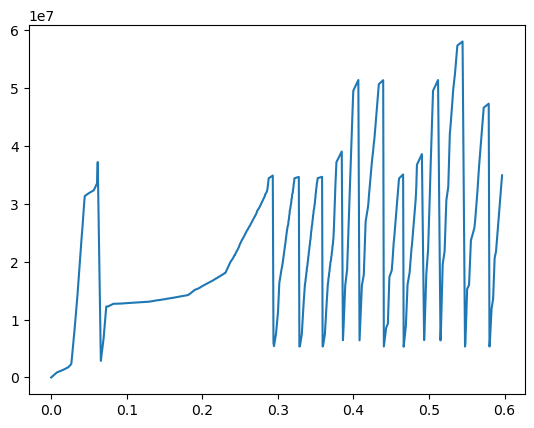

In [12]:
plt.plot(time_minor,memory_used)

In [33]:
time_minor_start = np.array([int(event["start"], 16)  for event in minor], dtype=float)
time_minor_start -= time_minor_start[0]

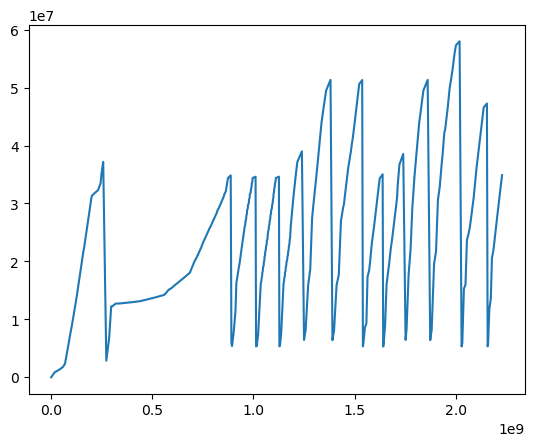

In [34]:
plt.plot(time_minor_start,memory_used)

True